In [1]:
import copy 
import warnings
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import time
import datetime
%matplotlib inline

In [2]:
df = pd.read_csv("0215train.csv")

In [3]:
df.shape

(10000000, 9)

In [4]:
df.index = np.arange(1,len(df)+1)

In [5]:
df.head(10)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time,daytime_nightime
1,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,17,0
2,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,16,0
3,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,0,1
4,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,4,1
5,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,7,0
6,12.1,-74.000964,40.731630,-73.972892,40.758233,1,2011-01-06,9,0
7,7.5,-73.980002,40.751662,-73.973802,40.764842,1,2012-11-20,20,0
8,16.5,-73.951300,40.774138,-73.990095,40.751048,1,2012-01-04,17,0
9,9.0,-74.006462,40.726713,-73.993078,40.731628,1,2012-12-03,13,0
10,8.9,-73.980658,40.733873,-73.991540,40.758138,2,2009-09-02,1,1


In [6]:
df['date'] = df['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').date())
df['Year'] = df['date'].apply(lambda x: datetime.datetime.strftime(x, '%Y')).astype('int64')
df['Month'] = df['date'].apply(lambda x: datetime.datetime.strftime(x, '%m')).astype('int64')

In [7]:
df.shape

(10000000, 11)

In [8]:
df_train = df[:8000000]
df_test = df[8000000:]

In [9]:
df_train['date']=pd.to_datetime(df_train['date'])
df_train.sort_values(by=['date'], inplace=True, ascending=False)
df_train.index = np.arange(1,len(df_train)+1)

/Users/yu_hsuantseng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/yu_hsuantseng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
df_train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time,daytime_nightime,Year,Month
1,21.50,-73.950104,40.773853,-73.983185,40.761868,1,2015-06-30,10,0,2015,6
2,5.00,-73.980972,40.774319,-73.979912,40.781124,2,2015-06-30,19,0,2015,6
3,5.00,0.000000,0.000000,0.000000,0.000000,1,2015-06-30,20,0,2015,6
4,43.54,-73.874748,40.774078,-73.984718,40.760738,5,2015-06-30,10,0,2015,6
5,19.50,-74.007065,40.740047,-73.956367,40.766895,1,2015-06-30,21,0,2015,6


In [12]:
average_fare=[]
month = []
for i in range(1,13):
    add=0
    target = df_train.loc[df_train['Month']==i]
    for fare in target['fare_amount']:
        add+=fare
    average_fare.append(add/len(target['fare_amount']))
    month.append(i)
    
    
    

# EDA Based on month

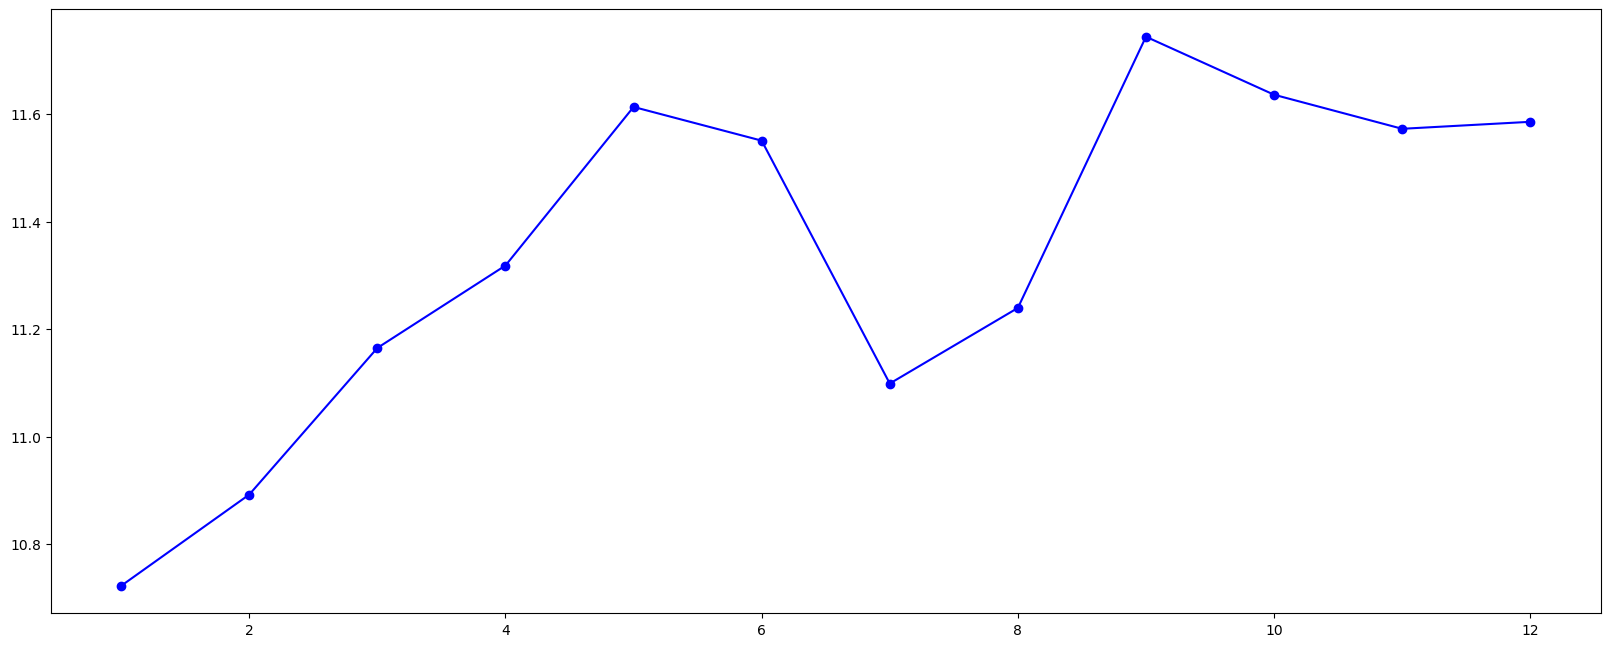

In [13]:
plt.figure(figsize=(20,8),dpi=100,linewidth = 1)
plt.plot(month,average_fare,'o-',color = 'b', label="fare time sequence")
plt.show()

In [14]:
df_train.tail()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time,daytime_nightime,Year,Month
7999996,13.4,-74.009356,40.713156,-73.985537,40.674047,1,2009-01-01,4,1,2009,1
7999997,7.4,-73.967870,40.765407,-73.948472,40.784837,1,2009-01-01,0,1,2009,1
7999998,10.2,-74.007301,40.707213,-74.006208,40.735009,1,2009-01-01,20,0,2009,1
7999999,7.7,-73.983737,40.761288,-73.962275,40.779093,3,2009-01-01,13,0,2009,1
8000000,8.5,-73.979025,40.747162,-73.982408,40.768280,2,2009-01-01,19,0,2009,1


# EDA Based on year - average fare_amount

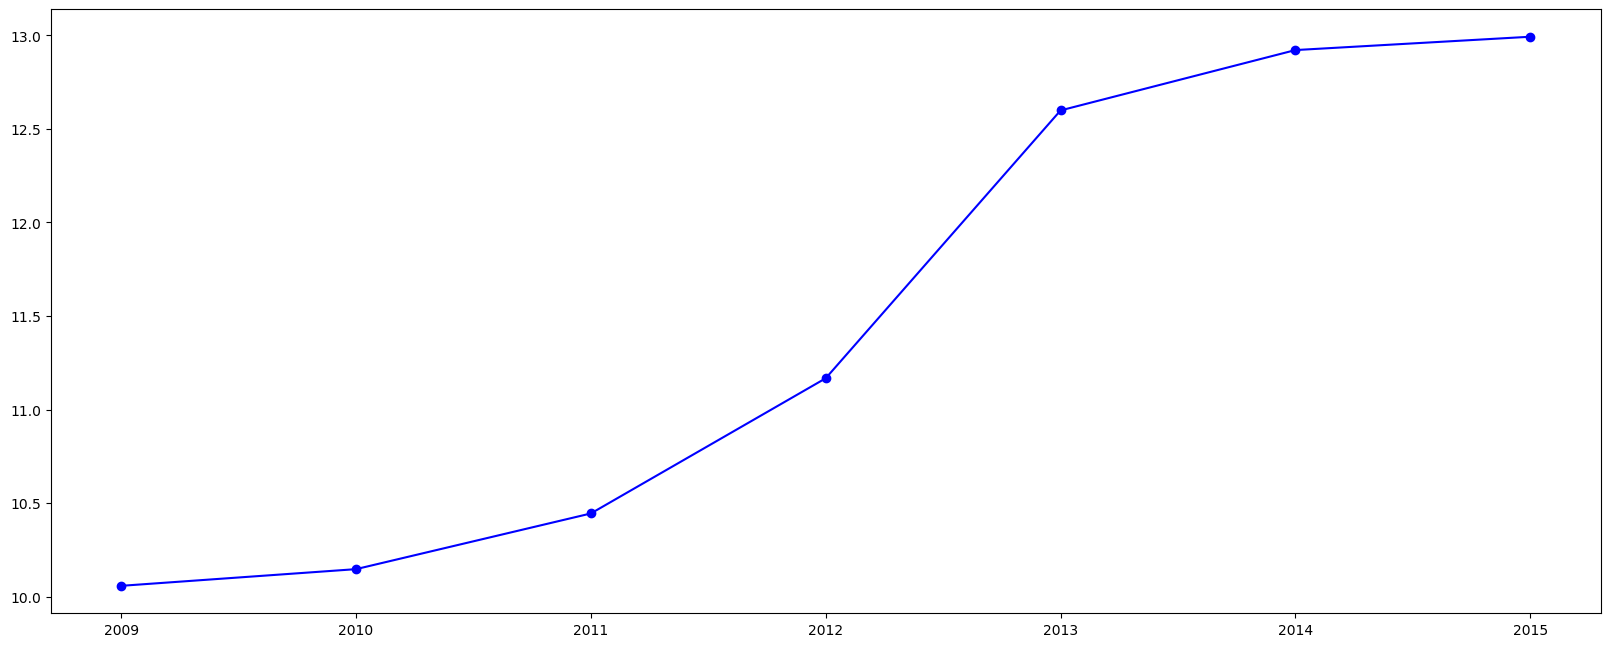

In [16]:
average_fare=[]
month = []
for i in range(2009,2016):
    add=0
    target = df_train.loc[df_train['Year']==i]
    for fare in target['fare_amount']:
        add+=fare
    average_fare.append(add/len(target['fare_amount']))
    month.append(i)
    
    
plt.figure(figsize=(20,8),dpi=100,linewidth = 1)
plt.plot(month,average_fare,'o-',color = 'b', label="fare time sequence")
plt.show()

# hypothesis-1 Global ecnonomy effect

# 1. 搭乘數次而並非人數

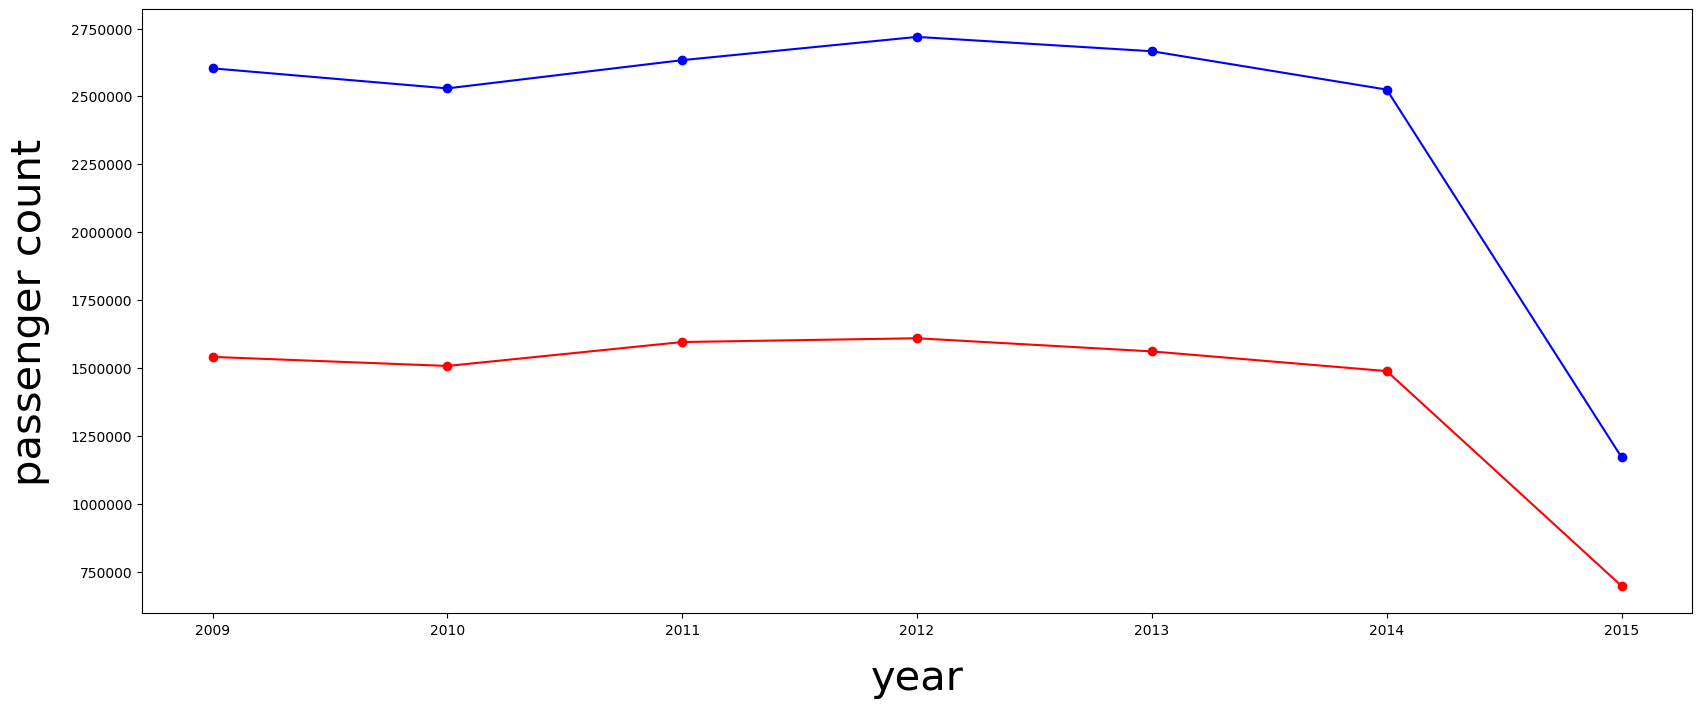

In [21]:
total_user = []
year = []
for i in range(2009,2016):
    add=0
    target = df.loc[df['Year']==i]
    total_user.append(len(target))
    year.append(i)
    
total_count = []
year = []
for i in range(2009,2016):
    add=0
    target = df.loc[df['Year']==i]
    for d in target['passenger_count']:
        add+=d
    total_count.append(add)
    year.append(i)
        
plt.figure(figsize=(20,8),dpi=100,linewidth = 1)
plt.plot(year,total_user,'o-',color = 'r', label="搭乘次數")
plt.plot(year,total_count,'o-',color = 'b', label="搭乘人數")
plt.xlabel("year", fontsize=30, labelpad = 15)
plt.ylabel("passenger count", fontsize=30, labelpad = 15)
plt.show()

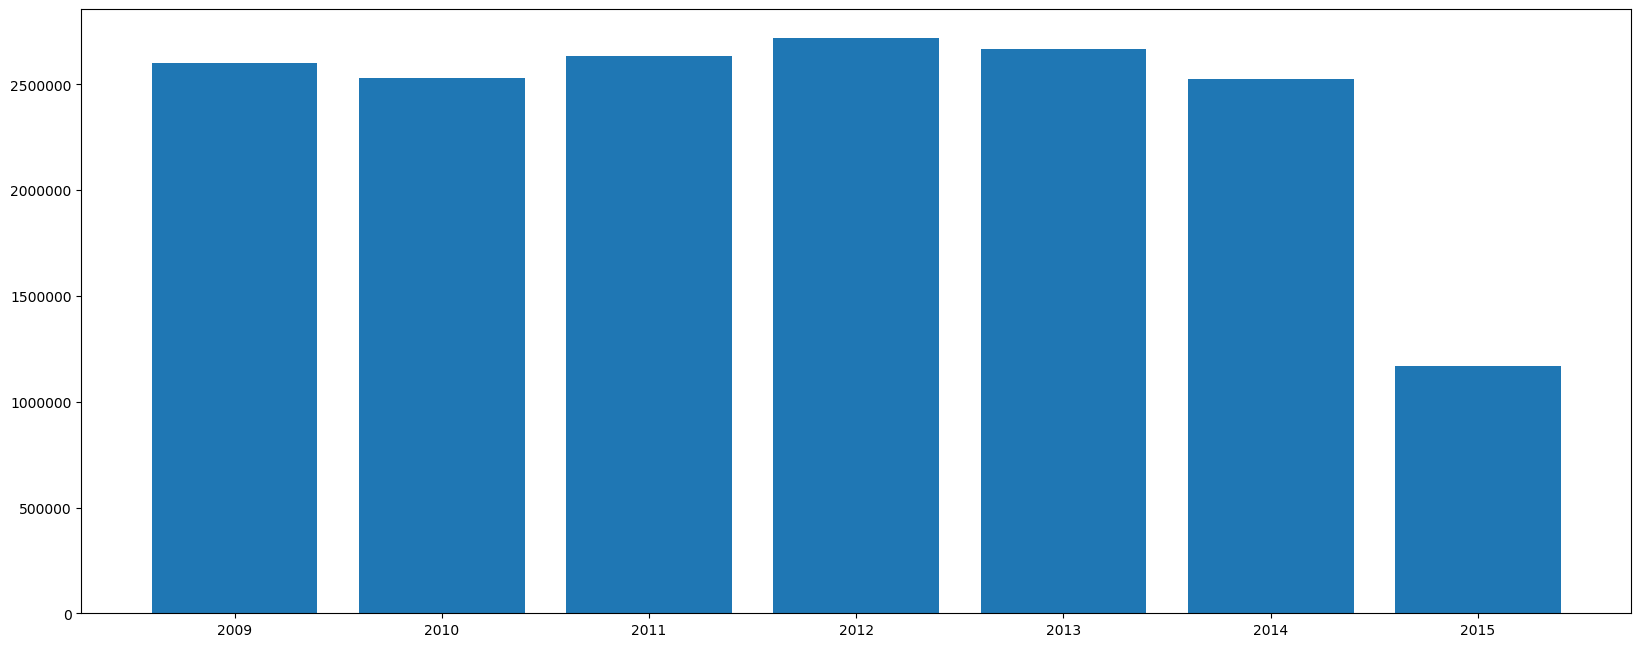

In [22]:
total_count = []
year = []
for i in range(2009,2016):
    add=0
    target = df.loc[df['Year']==i]
    for d in target['passenger_count']:
        add+=d
    total_count.append(add)
    year.append(i)
    
    
plt.figure(figsize=(20,8),dpi=100,linewidth = 1)
plt.bar(year, total_count)
plt.show()

# 發現2015年 搭乘次數以及總搭乘人數明顯下降